In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
cars = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Scatterplot between variables along with histograms

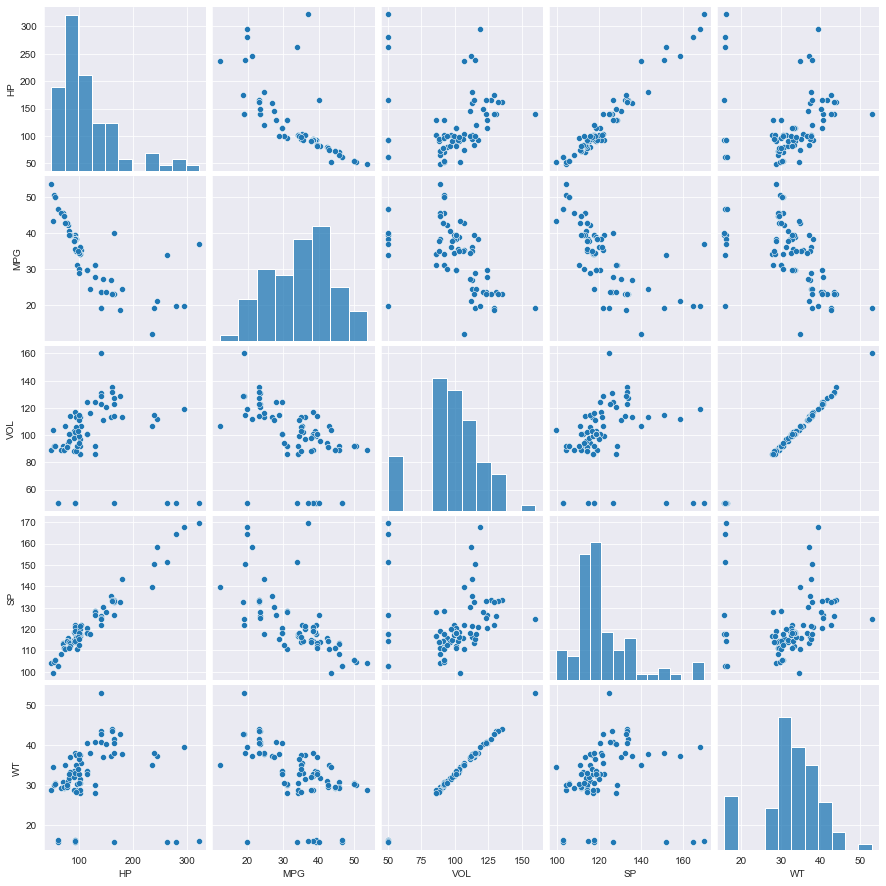

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [7]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [8]:
#Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

# Simple Linear Regression Models

In [11]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [12]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [13]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculating VIF

In [14]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

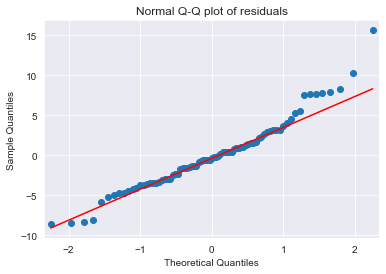

In [15]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>10))

[array([ 0, 76])]

## Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

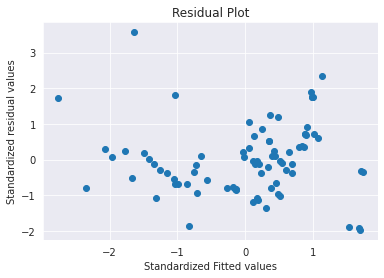

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

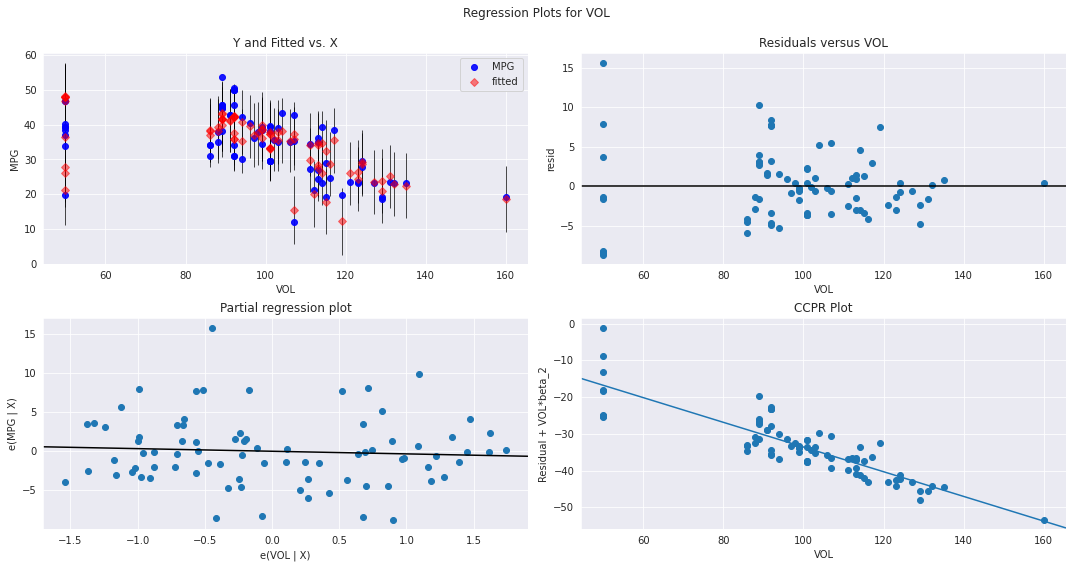

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

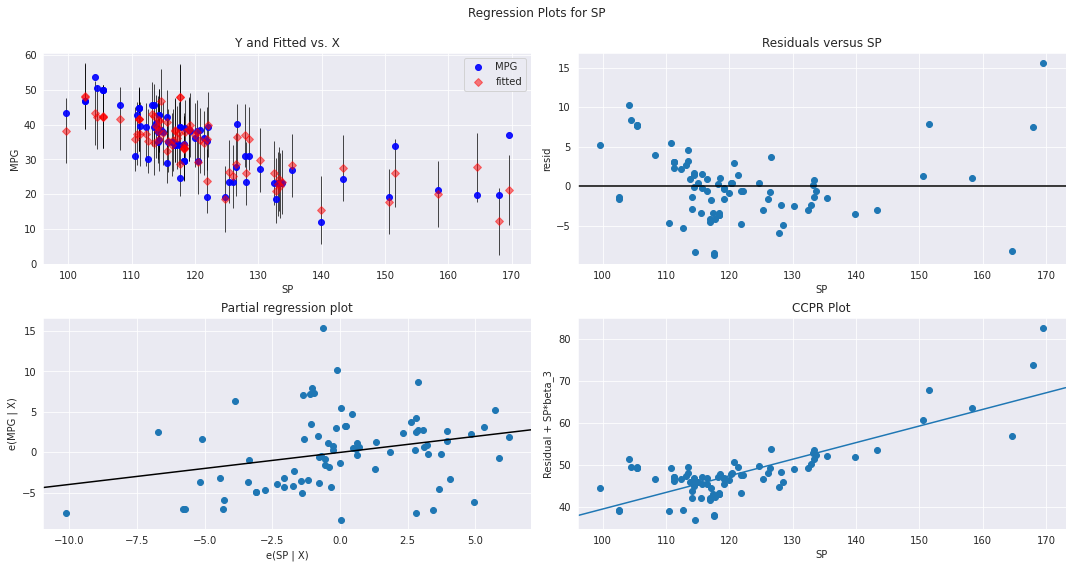

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

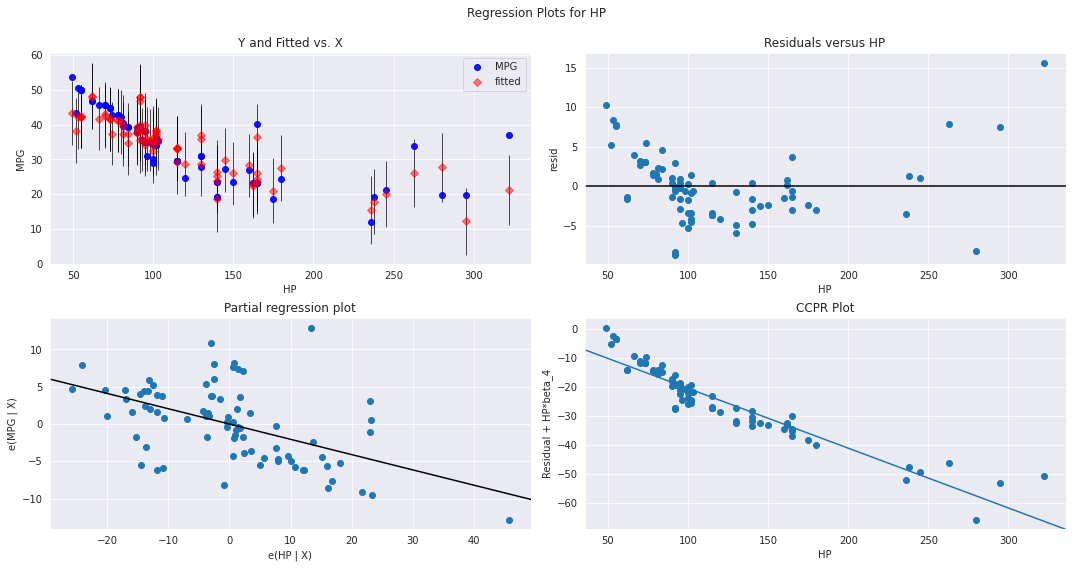

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

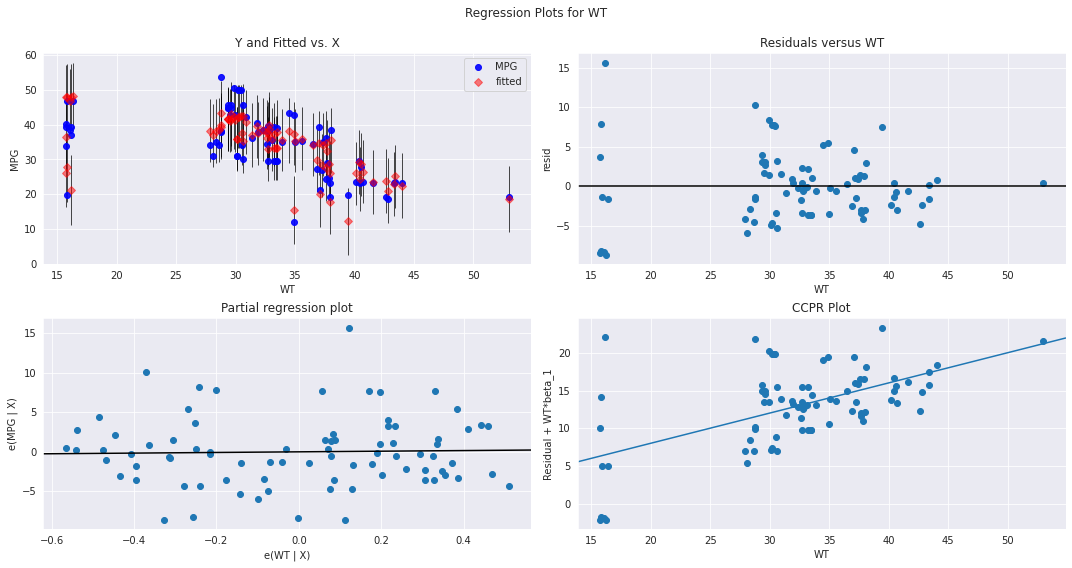

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


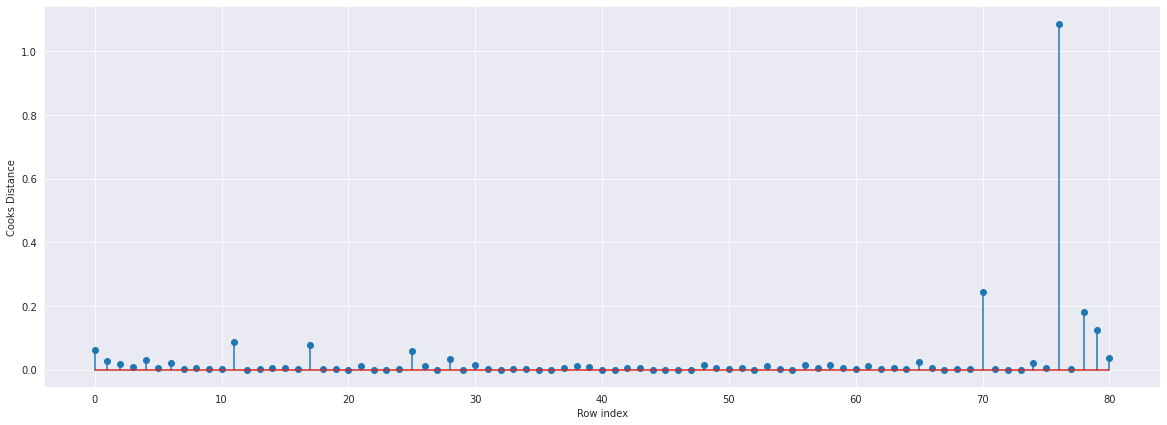

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998179985)

## High Influence points

In [ ]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.2222222222222222

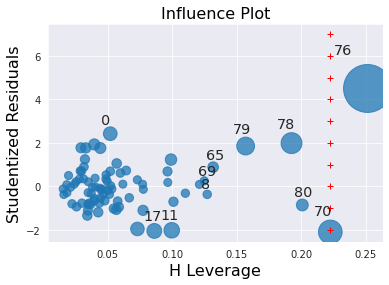

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,aplha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()


<em style="color:green"><strong> From the above plot, it is evident that data point 70 and 76 are the influencers</em>


In [ ]:
cars[cars.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [ ]:
#See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [ ]:
#Load the data
cars_new = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Cars.csv")

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [ ]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [ ]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Build Model

In [ ]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = cars).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.770368341321302, 475.9875158854609, 485.56531250415065)

In [ ]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = cars).fit()

In [ ]:
(final_ml_W.rsquared,final_ml_W.aic,final_ml_W.bic)

(0.7694828139983458, 476.29927501529767, 485.87707163398744)

<em style="color:green;"> Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


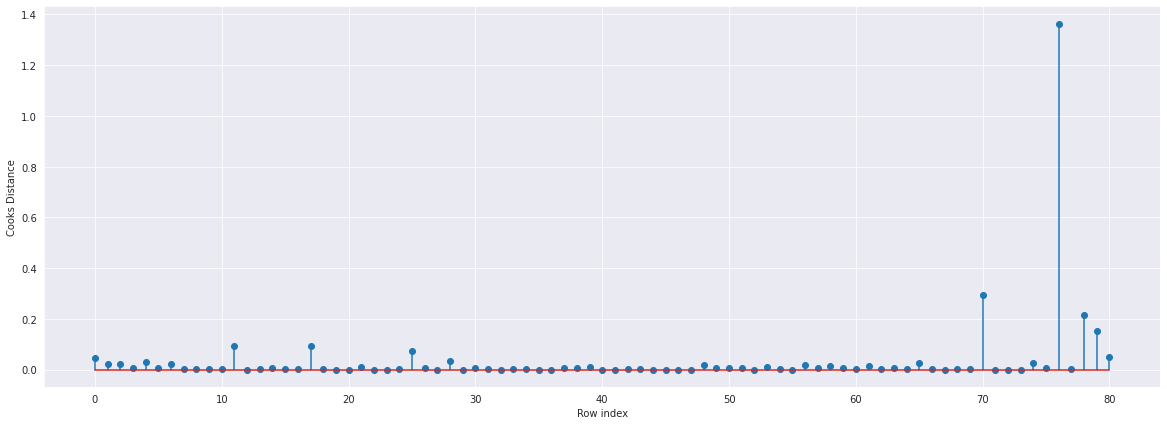

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)+2),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.3641743869103298)

In [ ]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[76,77]],axis=0)

In [ ]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [ ]:
car4=car3.drop(['index'],axis=1)

In [ ]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [ ]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


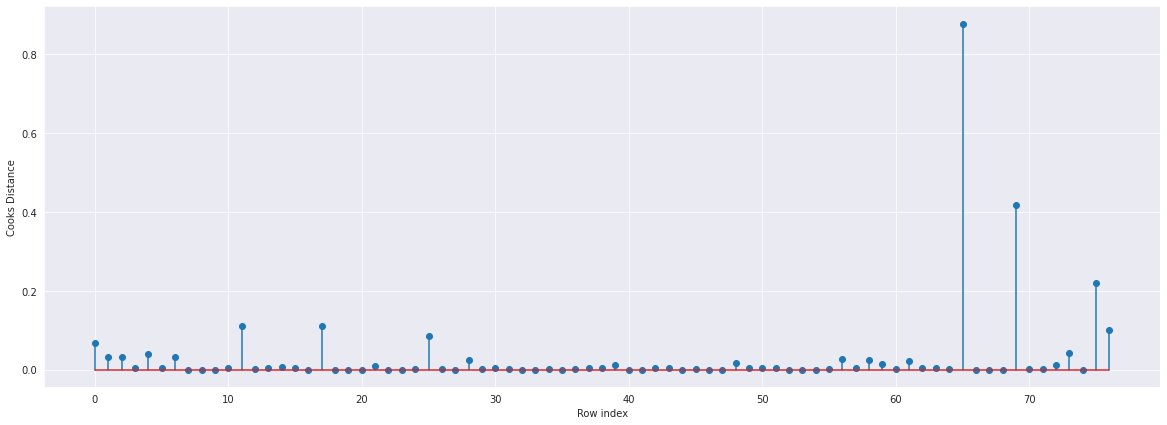

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296681)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [ ]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.866963611185906, 409.41530627195095)

## Predicting for new data

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [ ]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64

In [ ]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [ ]:
pred_y = final_ml_V.predict(cars_new)

In [ ]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64